In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import pickle
import sklearn
import scipy

 
sns.set()

In [13]:
dataset1 = pd.read_csv('kidney_dataset.csv')

In [14]:
dataset1.shape

(158, 25)

In [15]:
dataset1.head(10)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,48,70,1.005,4,0,0,1,1,0,117,...,32,6700,3.9,1,0,0,0,1,1,1
1,53,90,1.020,2,0,1,1,1,0,70,...,29,12100,3.7,1,1,0,0,0,1,1
2,63,70,1.010,3,0,1,1,1,0,380,...,32,4500,3.8,1,1,0,0,1,0,1
3,68,80,1.010,3,2,0,1,1,1,157,...,16,11000,2.6,1,1,1,0,1,0,1
4,61,80,1.015,2,0,1,1,0,0,173,...,24,9200,3.2,1,1,1,0,1,1,1
5,48,80,1.025,4,0,0,1,0,0,95,...,32,6900,3.4,1,0,0,1,0,1,1
6,69,70,1.010,3,4,0,1,0,0,264,...,37,9600,4.1,1,1,1,1,1,0,1
7,73,70,1.005,0,0,0,0,0,0,70,...,29,18900,3.5,1,1,0,1,1,0,1
8,73,80,1.020,2,0,1,1,0,0,253,...,33,7200,4.3,1,1,1,1,0,0,1
9,46,60,1.010,1,0,0,0,0,0,163,...,28,14600,3.2,1,1,0,1,0,0,1


In [16]:
dataset=dataset1.drop(['sg','al','rbc','pc','pcc','ba','sod','pot','hemo','sc','pcv','pe'],axis =1 )

In [17]:
dataset.head(10)

,age,bp,su,bgr,bu,wc,rc,htn,dm,cad,appet,ane,class
0,48,70,0,117,56,6700,3.9,1,0,0,0,1,1
1,53,90,0,70,107,12100,3.7,1,1,0,0,1,1
2,63,70,0,380,60,4500,3.8,1,1,0,0,0,1
3,68,80,2,157,90,11000,2.6,1,1,1,0,0,1
4,61,80,0,173,148,9200,3.2,1,1,1,0,1,1
5,48,80,0,95,163,6900,3.4,1,0,0,1,1,1
6,69,70,4,264,87,9600,4.1,1,1,1,1,0,1
7,73,70,0,70,32,18900,3.5,1,1,0,1,0,1
8,73,80,0,253,142,7200,4.3,1,1,1,1,0,1
9,46,60,0,163,92,14600,3.2,1,1,0,1,0,1


In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     158 non-null    int64  
 1   bp      158 non-null    int64  
 2   su      158 non-null    int64  
 3   bgr     158 non-null    int64  
 4   bu      158 non-null    int64  
 5   wc      158 non-null    int64  
 6   rc      158 non-null    float64
 7   htn     158 non-null    int64  
 8   dm      158 non-null    int64  
 9   cad     158 non-null    int64  
 10  appet   158 non-null    int64  
 11  ane     158 non-null    int64  
 12  class   158 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 16.2 KB


In [19]:
dataset.dropna(axis=0)

,age,bp,su,bgr,bu,wc,rc,htn,dm,cad,appet,ane,class
0,48,70,0,117,56,6700,3.9,1,0,0,0,1,1
1,53,90,0,70,107,12100,3.7,1,1,0,0,1,1
2,63,70,0,380,60,4500,3.8,1,1,0,0,0,1
3,68,80,2,157,90,11000,2.6,1,1,1,0,0,1
4,61,80,0,173,148,9200,3.2,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,55,80,0,140,49,6700,4.9,0,0,0,1,0,0
154,42,70,0,75,31,7800,6.2,0,0,0,1,0,0
155,12,80,0,100,26,6600,5.4,0,0,0,1,0,0
156,17,60,0,114,50,7200,5.9,0,0,0,1,0,0


In [20]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,158.0,49.563291,15.512244,6.0,39.25,50.50,60.00,83.0
bp,158.0,74.050633,11.175381,50.0,60.00,80.00,80.00,110.0
su,158.0,0.253165,0.813397,0.0,0.00,0.00,0.00,5.0
bgr,158.0,131.341772,64.939832,70.0,97.00,115.50,131.75,490.0
bu,158.0,52.575949,47.395382,10.0,26.00,39.50,49.75,309.0
wc,158.0,8475.949367,3126.880181,3800.0,6525.00,7800.00,9775.00,26400.0
rc,158.0,4.891772,1.019364,2.1,4.50,4.95,5.60,8.0
htn,158.0,0.215190,0.412261,0.0,0.00,0.00,0.00,1.0
dm,158.0,0.177215,0.383065,0.0,0.00,0.00,0.00,1.0
cad,158.0,0.069620,0.255315,0.0,0.00,0.00,0.00,1.0


In [21]:
print(dataset.isnull().values.any())
dataset = dataset.dropna()
print(dataset.isnull().values.any()) 

False
False


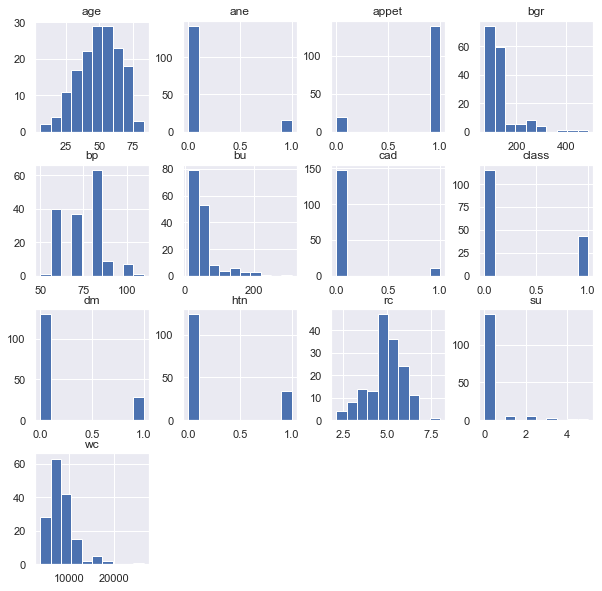

In [22]:
from matplotlib.pyplot import figure
# for feature in data_feature:
#     plt.hist(data[feature])
#     plt.show()
p = dataset.hist(figsize = (10,10)) 

In [23]:
#sns.pairplot(data =dataset)
plt.show()

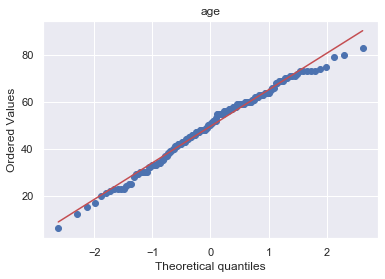

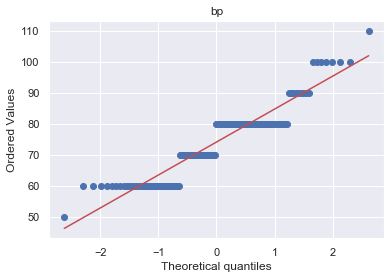

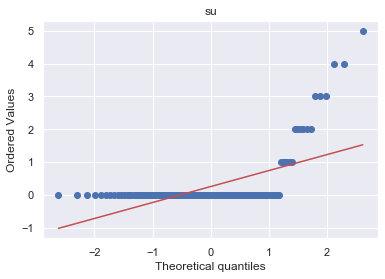

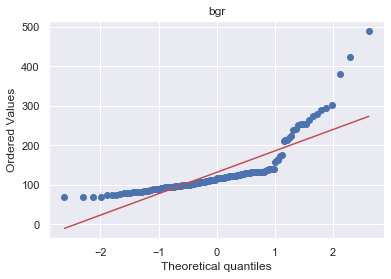

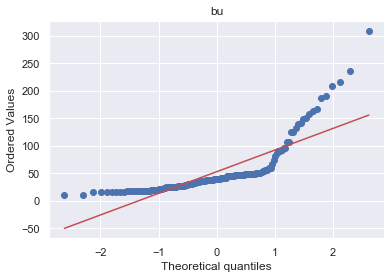

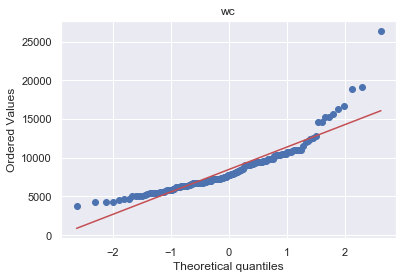

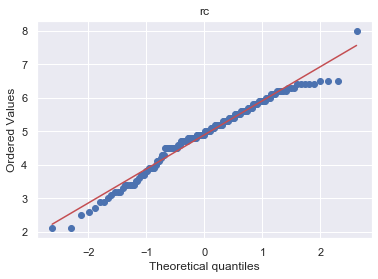

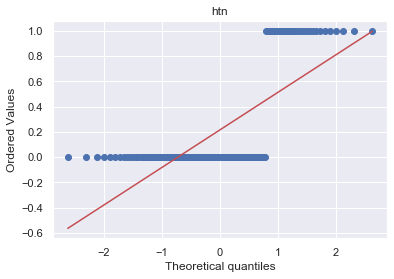

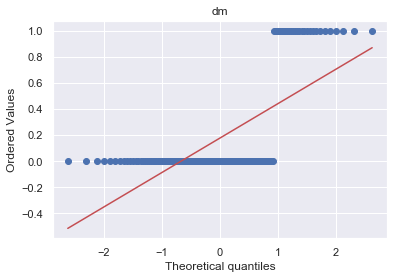

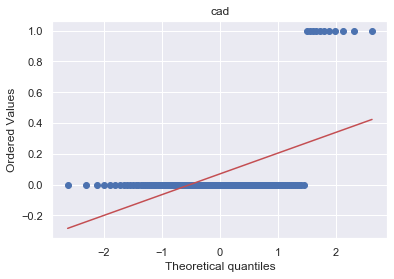

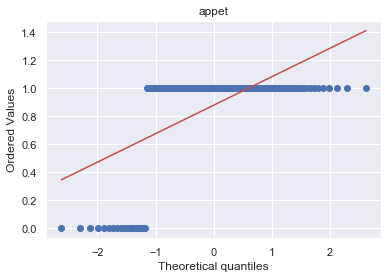

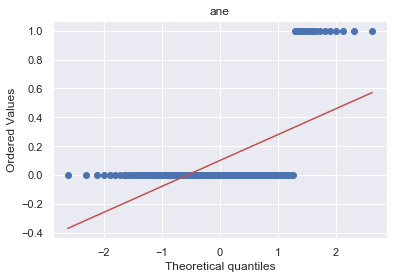

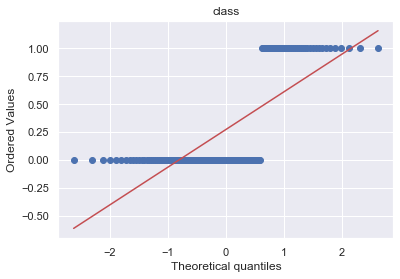

In [24]:
from scipy import stats
for feature in dataset.columns:
    stats.probplot(dataset[feature], plot = plt)
    plt.title(feature)
    plt.show()

In [25]:
def plot_corr(dataset, size=17):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        data_frame: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                Expect a darkred line running from top left to bottom right
    """

    corr = dataset.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks

In [26]:
dataset.corr()

,age,bp,su,bgr,bu,wc,rc,htn,dm,cad,appet,ane,class
age,1.000000,0.079712,0.207711,0.301915,0.190636,0.153132,-0.242235,0.372348,0.323957,0.269868,-0.170259,0.105809,0.305119
bp,0.079712,1.000000,0.243828,0.190113,0.316287,0.008274,-0.228533,0.334951,0.218096,0.257709,-0.145047,0.311097,0.326567
su,0.207711,0.243828,1.000000,0.730050,0.312259,0.201000,-0.377726,0.577286,0.591010,0.466658,-0.220547,0.179811,0.510615
bgr,0.301915,0.190113,0.730050,1.000000,0.326496,0.212093,-0.418085,0.579407,0.663012,0.459164,-0.338924,0.139854,0.591217
bu,0.190636,0.316287,0.312259,0.326496,1.000000,0.128961,-0.621456,0.623738,0.565137,0.312485,-0.502091,0.654444,0.677611
wc,0.153132,0.008274,0.201000,0.212093,0.128961,1.000000,-0.272390,0.223916,0.287010,0.021259,-0.328730,0.139224,0.407570
rc,-0.242235,-0.228533,-0.377726,-0.418085,-0.621456,-0.272390,1.000000,-0.671740,-0.594881,-0.362439,0.556182,-0.581576,-0.719978
htn,0.372348,0.334951,0.577286,0.579407,0.623738,0.223916,-0.671740,1.000000,0.765298,0.522407,-0.564008,0.538941,0.856334
dm,0.323957,0.218096,0.591010,0.663012,0.565137,0.287010,-0.594881,0.765298,1.000000,0.459176,-0.490885,0.283750,0.758965
cad,0.269868,0.257709,0.466658,0.459164,0.312485,0.021259,-0.362439,0.522407,0.459176,1.000000,-0.128235,0.237906,0.447355


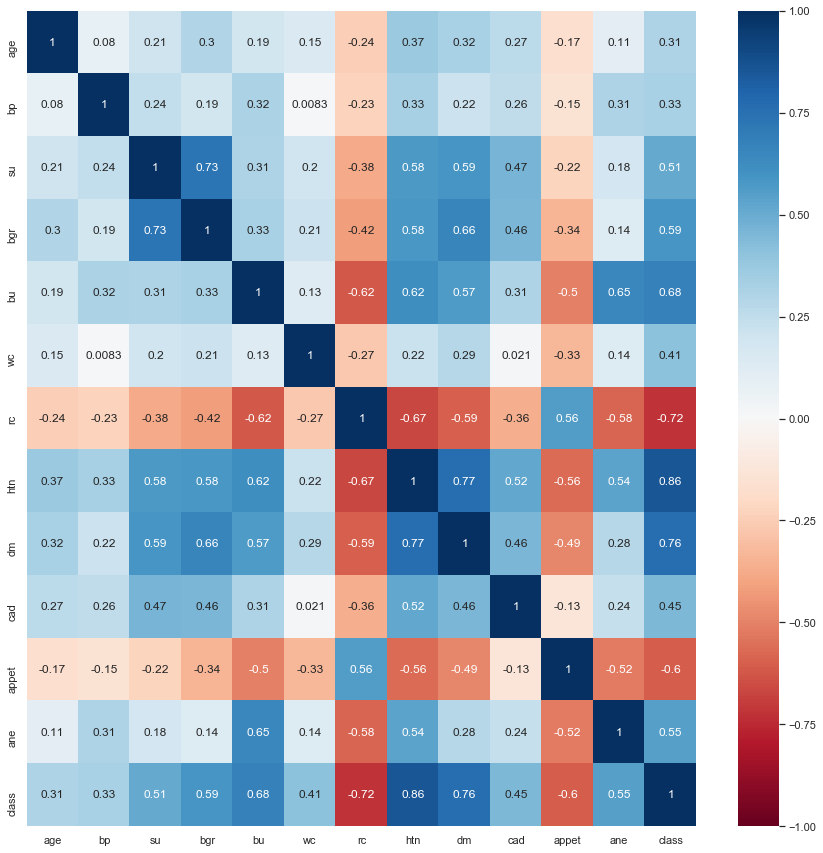

In [27]:
import seaborn as sns
fig , ax=plt.subplots(figsize=(15,15))
sns.heatmap(dataset.corr(), cmap='RdBu',center=0, vmin=-1 ,vmax=1, annot=True);

In [28]:
dataset.head(10)

,age,bp,su,bgr,bu,wc,rc,htn,dm,cad,appet,ane,class
0,48,70,0,117,56,6700,3.9,1,0,0,0,1,1
1,53,90,0,70,107,12100,3.7,1,1,0,0,1,1
2,63,70,0,380,60,4500,3.8,1,1,0,0,0,1
3,68,80,2,157,90,11000,2.6,1,1,1,0,0,1
4,61,80,0,173,148,9200,3.2,1,1,1,0,1,1
5,48,80,0,95,163,6900,3.4,1,0,0,1,1,1
6,69,70,4,264,87,9600,4.1,1,1,1,1,0,1
7,73,70,0,70,32,18900,3.5,1,1,0,1,0,1
8,73,80,0,253,142,7200,4.3,1,1,1,1,0,1
9,46,60,0,163,92,14600,3.2,1,1,0,1,0,1


In [29]:
x = dataset.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12]].values
y = dataset.iloc[:,12].values

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state =0)

In [31]:
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler()
scaler.fit(dataset) 
scaled_data=scaler.transform(dataset) 
scaled_data

array([[-0.10109832, -0.36361289, -0.31223331, ..., -2.70477161,
         2.97909382,  1.63536498],
       [ 0.22225259,  1.43172574, -0.31223331, ..., -2.70477161,
         2.97909382,  1.63536498],
       [ 0.8689544 , -0.36361289, -0.31223331, ..., -2.70477161,
        -0.33567254,  1.63536498],
       ...,
       [-2.42922485,  0.53405643, -0.31223331, ...,  0.36971698,
        -0.33567254, -0.6114843 ],
       [-2.10587394, -1.2612822 , -0.31223331, ...,  0.36971698,
        -0.33567254, -0.6114843 ],
       [ 0.54560349,  0.53405643, -0.31223331, ...,  0.36971698,
        -0.33567254, -0.6114843 ]])

In [32]:
from sklearn.decomposition import PCA 

pca=PCA(n_components=12) 

pca.fit(scaled_data) 
x_pca=pca.transform(scaled_data)

In [33]:
scaled_data.shape 

(158, 13)

In [34]:
x_pca.shape

(158, 12)

In [35]:
from sklearn.model_selection import train_test_split 
print (y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]


In [36]:
trainval = (1.0 * len(x_train)) / (1.0 * len(dataset.index))
testval = (1.0 * len(x_test)) / (1.0 * len(dataset.index))
print("{0:0.2f}% in training set".format(trainval * 100))
print("{0:0.2f}% in test set".format(testval * 100))

79.75% in training set
20.25% in test set


In [37]:
print("Original True  : {0} ({1:0.2f}%)".format(len(dataset.loc[dataset['class'] == 1]), (len(dataset.loc[dataset['class'] == 1])/len(dataset.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(dataset.loc[dataset['class'] == 0]), (len(dataset.loc[dataset['class'] == 0])/len(dataset.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))

Original True  : 43 (27.22%)
Original False : 115 (72.78%)

Training True  : 35 (27.78%)
Training False : 91 (72.22%)

Test True      : 8 (25.00%)
Test False     : 24 (75.00%)


In [38]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(x_train)

x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test)

In [39]:
def knn_classifier(x_train, x_test, y_train, y_test):
   classifier_knn = KNeighborsClassifier(n_neighbors = 8,p=2,metric ='minkowski')
   classifier_knn.fit(x_train,y_train)

   y1_pred = classifier_knn.predict(x_test)

   cm = confusion_matrix(y_test, y1_pred)

   return print(f"Train score : {classifier_knn.score(x_train, y_train)}\nTest score : {classifier_knn.score(x_test, y_test)}")

In [40]:
def svm_classifier(x_train, x_test, y_train, y_test):
    classifier_svm = SVC(kernel = 'rbf', random_state = 0)
    classifier_svm.fit(x_train,y_train)

#predicting reults
    y2_pred = classifier_svm.predict(x_test)

    cm = confusion_matrix(y_test, y2_pred)

    return print(f"Train score : {classifier_svm.score(x_train, y_train)}\nTest score : {classifier_svm.score(x_test, y_test)}")

In [41]:
def forest_classifier(x_train, x_test, y_train, y_test):
    classifier_forest = RandomForestClassifier(n_estimators=16,criterion = "entropy",random_state=0)
    classifier_forest.fit(x_train,y_train)

#predicting reults
    y3_pred = classifier_forest.predict(x_test)

    cm = confusion_matrix(y_test, y3_pred)

    return print(f"Train score : {classifier_forest.score(x_train, y_train)}\nTest score : {classifier_forest.score(x_test, y_test)}")

In [42]:
def tree_classifier(x_train, x_test, y_train, y_test):
    classifier_tree = DecisionTreeClassifier(criterion = "entropy",random_state=0)
    classifier_tree.fit(x_train,y_train)

#predicting reults
    y4_pred = classifier_tree.predict(x_test)

    cm = confusion_matrix(y_test, y4_pred)

    return print(f"Train score : {classifier_tree.score(x_train, y_train)}\nTest score : {classifier_tree.score(x_test, y_test)}")

In [43]:
def logistic_regression (x_train,x_test,y_train,y_test):
    regression1 = LogisticRegression(C=0.7, random_state=50)
    regression1.fit(x_train, y_train)

    y5_pred = regression1.predict(x_test)

    cm = confusion_matrix(y_test, y5_pred)

    return print(f"Train score : {regression1.score(x_train, y_train)}\nTest score : {regression1.score(x_test, y_test)}")

In [44]:
def print_score(x_train, x_test, y_train, y_test):
    print("KNN:\n")
    knn_classifier(x_train, x_test, y_train, y_test)

    print("-"*100)
    print()

    print("SVM:\n")
    svm_classifier(x_train, x_test, y_train, y_test)

    print("-"*100)
    print()

    print("Random Forest:\n")
    forest_classifier(x_train, x_test, y_train, y_test)
    
    print("-"*100)
    print()
   
    print("Decision Tree:\n")
    tree_classifier(x_train, x_test, y_train, y_test)

    print("-"*100)
    print()

    print("logistic Regression:\n")
    logistic_regression(x_train, x_test, y_train, y_test)

    print("-"*100)
    print()

In [45]:
print_score(x_train, x_test, y_train, y_test)

KNN:

Train score : 0.9444444444444444
Test score : 1.0
----------------------------------------------------------------------------------------------------

SVM:

Train score : 1.0
Test score : 1.0
----------------------------------------------------------------------------------------------------

Random Forest:

Train score : 1.0
Test score : 1.0
----------------------------------------------------------------------------------------------------

Decision Tree:

Train score : 1.0
Test score : 1.0
----------------------------------------------------------------------------------------------------

logistic Regression:

Train score : 1.0
Test score : 1.0
----------------------------------------------------------------------------------------------------



In [46]:
classifier_forest = RandomForestClassifier(criterion = 'entropy')
classifier_forest.fit(x_train, y_train)
y_pred = classifier_forest.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
cm
print(cm)

[[24  0]
 [ 0  8]]


In [47]:
filename = 'kidney.pkl'
pickle.dump(classifier_forest, open(filename, 'wb')) 

In [48]:

#model = open('kidney.pkl','rb')
#forest = pickle.load(model) 

In [49]:
#y_pred = forest.predict(x_test) 

In [50]:
#confusion_matrix(y_test, y_pred) 